In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 22})

In [3]:
data = pd.read_csv('scraped_reddit.csv')

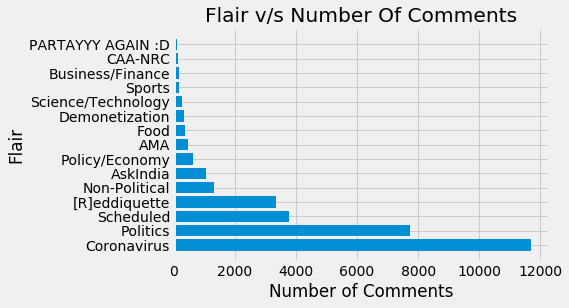

In [4]:
# Plotting number of comments against Flairs

df2 = data.head(50000)
df2 = df2.dropna()
df2 = df2.sort_values(by='comms_num', ascending=False)

plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Flair v/s Number Of Comments')
plt.ylabel('Flair')
plt.xlabel('Number of Comments')
plt.rcParams["figure.figsize"] = (20,20)
plt.barh(df2[df2['comms_num']>100]['flair'], df2[df2['comms_num']>100]['comms_num'])
plt.savefig('fig1.png')

In [5]:
# Adding 2 more columns to dataframe so as to
# distribute data according to months and years

data['Month'] = pd.Series([val[:-3] for val in data['created']])
data['Year'] = pd.Series([val[:-6] for val in data['created']])

data.head()

,title,score,id,url,comms_num,created,body,flair,Month,Year
0,How quarantine has affected you good/bad way?,1,g3yit2,https://www.reddit.com/r/india/comments/g3yit2...,0,2020-04-19,[removed],Coronavirus,2020-04,2020
1,What can a teenager who is born in an abusive/...,1,g3ybh4,https://www.reddit.com/r/india/comments/g3ybh4...,0,2020-04-19,[removed],AskIndia,2020-04,2020
2,Where to buy gym equipment for home workout,1,g3xng0,https://www.reddit.com/r/india/comments/g3xng0...,3,2020-04-19,Either online or if it opens on May 3rd then o...,AskIndia,2020-04,2020
3,Indians who take antidepressants. Did they rea...,2,g3xaac,https://www.reddit.com/r/india/comments/g3xaac...,10,2020-04-19,Which meds do you take? How did they help you?...,AskIndia,2020-04,2020
4,My favourite sitar bass music,1,g3x1yl,https://www.reddit.com/r/india/comments/g3x1yl...,0,2020-04-19,[removed],Non-Political,2020-04,2020


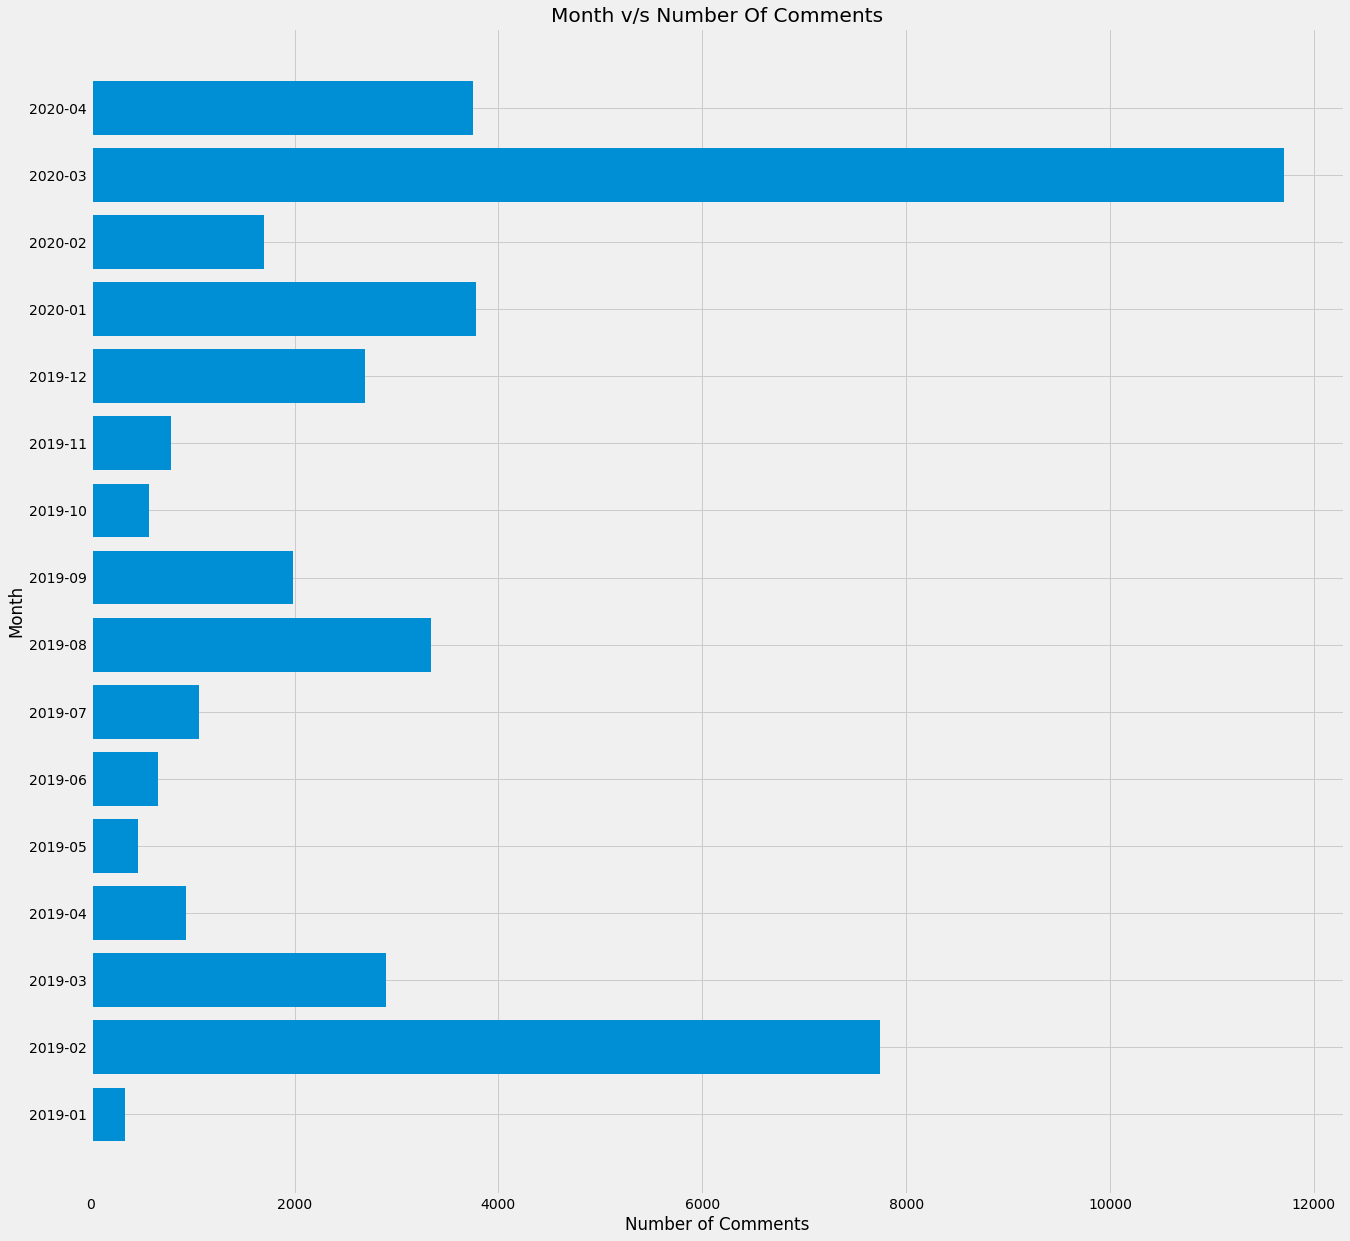

In [6]:
# Plotting number of comments against months

df2 = data.head(38000)
df2 = df2.dropna()
df2 = df2.sort_values(by='Month', ascending=True)

plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Month v/s Number Of Comments')
plt.ylabel('Month')
plt.xlabel('Number of Comments')
plt.rcParams["figure.figsize"] = (20,20)
plt.barh(df2[df2['comms_num']>100]['Month'], df2[df2['comms_num']>100]['comms_num'])
plt.savefig('fig2.png')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 3232 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 3232 missing from current font.
  font.set_text(s, 0, flags=flags)


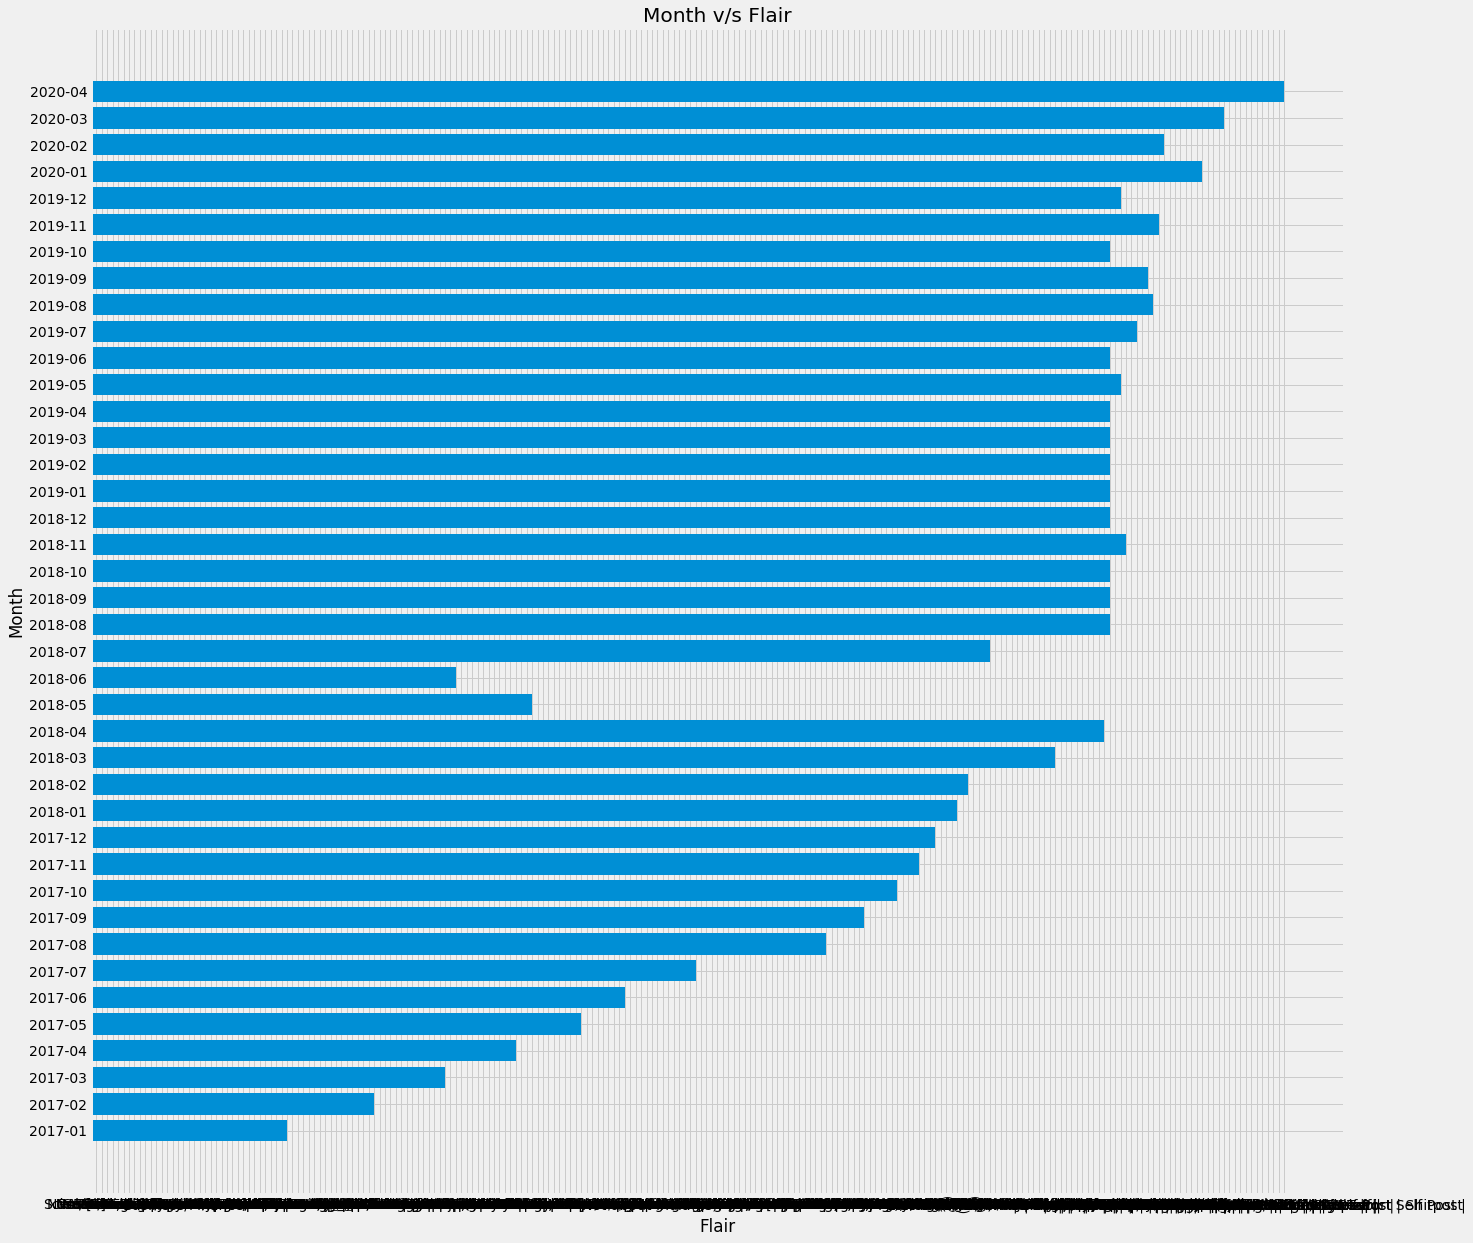

In [7]:
# Plotting flair against month

df2 = data.head(88000)
df2 = df2.dropna()
df2 = df2.sort_values(by='Month', ascending=True)

plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Month v/s Flair')
plt.ylabel('Month')
plt.xlabel('Flair')
plt.rcParams["figure.figsize"] = (20,20)
plt.barh(df2['Month'], df2['flair'])
plt.savefig('fig3.png')

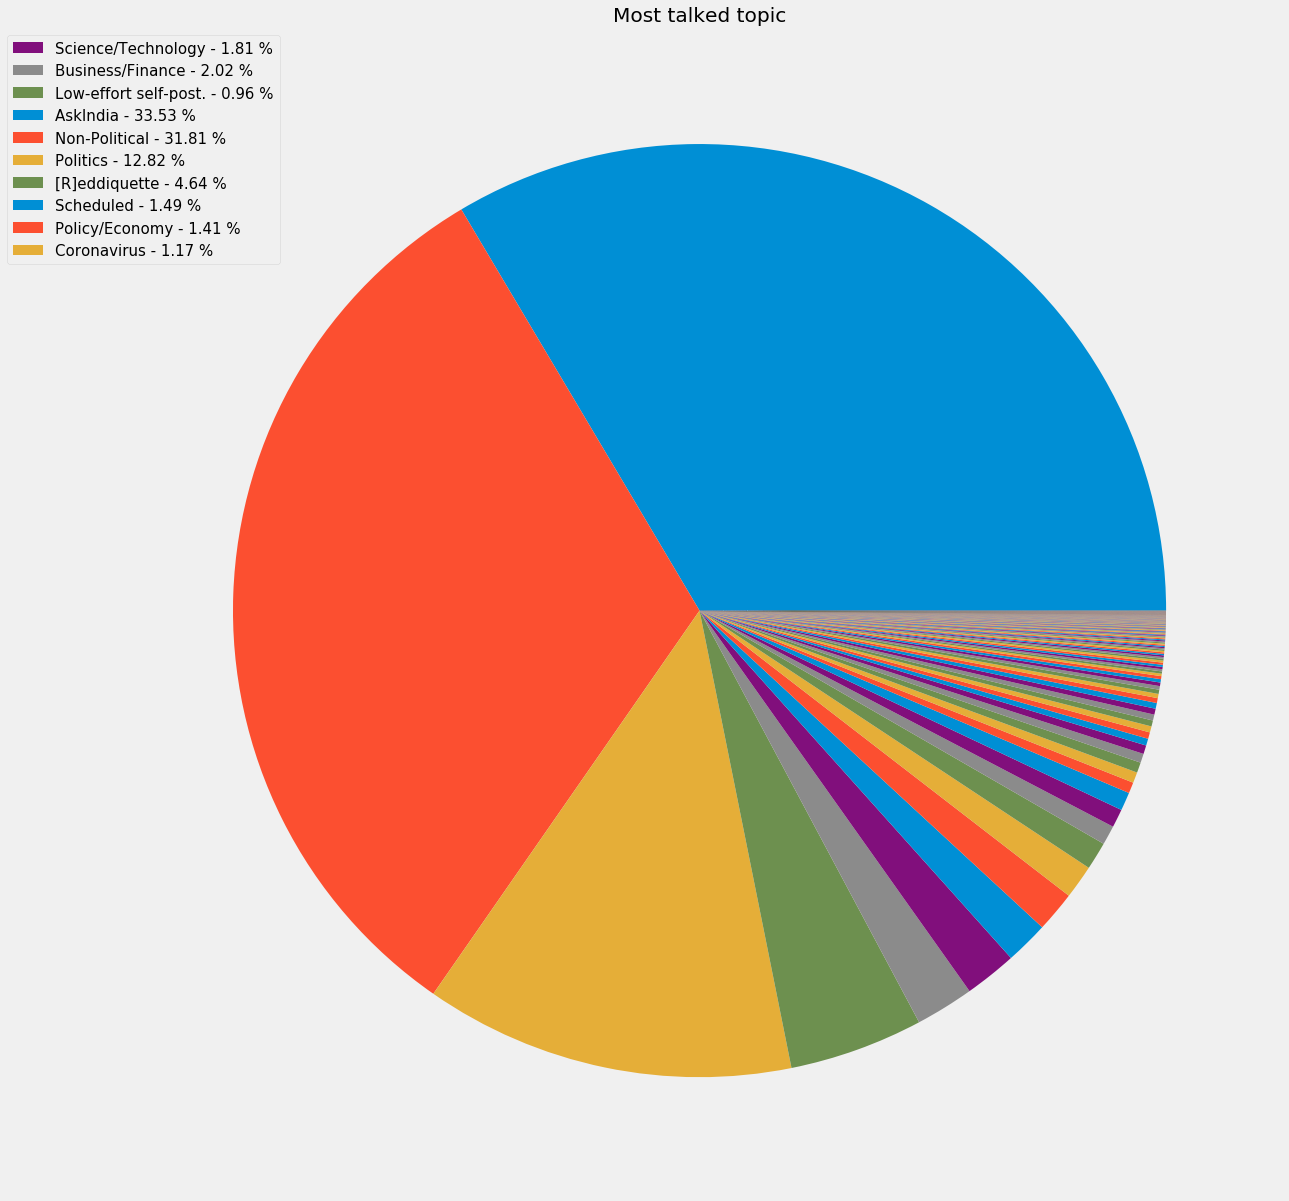

In [8]:
# Pie Chart for count of flairs froom data and calculating thier percentage
# for the legend

df2 = data.head(150000)
df2 = df2.dropna()

x=data['flair'].value_counts().index.tolist() #labels
s = pd.Series(data['flair'])
y=s.value_counts() # values

plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Most talked topic')
plt.rcParams["figure.figsize"] = (20,20)
patches, texts = plt.pie(y)
plt.savefig('fig4.png')

cent = 100.*y/y.sum()
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x[:10], cent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, s),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='upper left', bbox_to_anchor=(-0.1, 1.),
           fontsize=15)

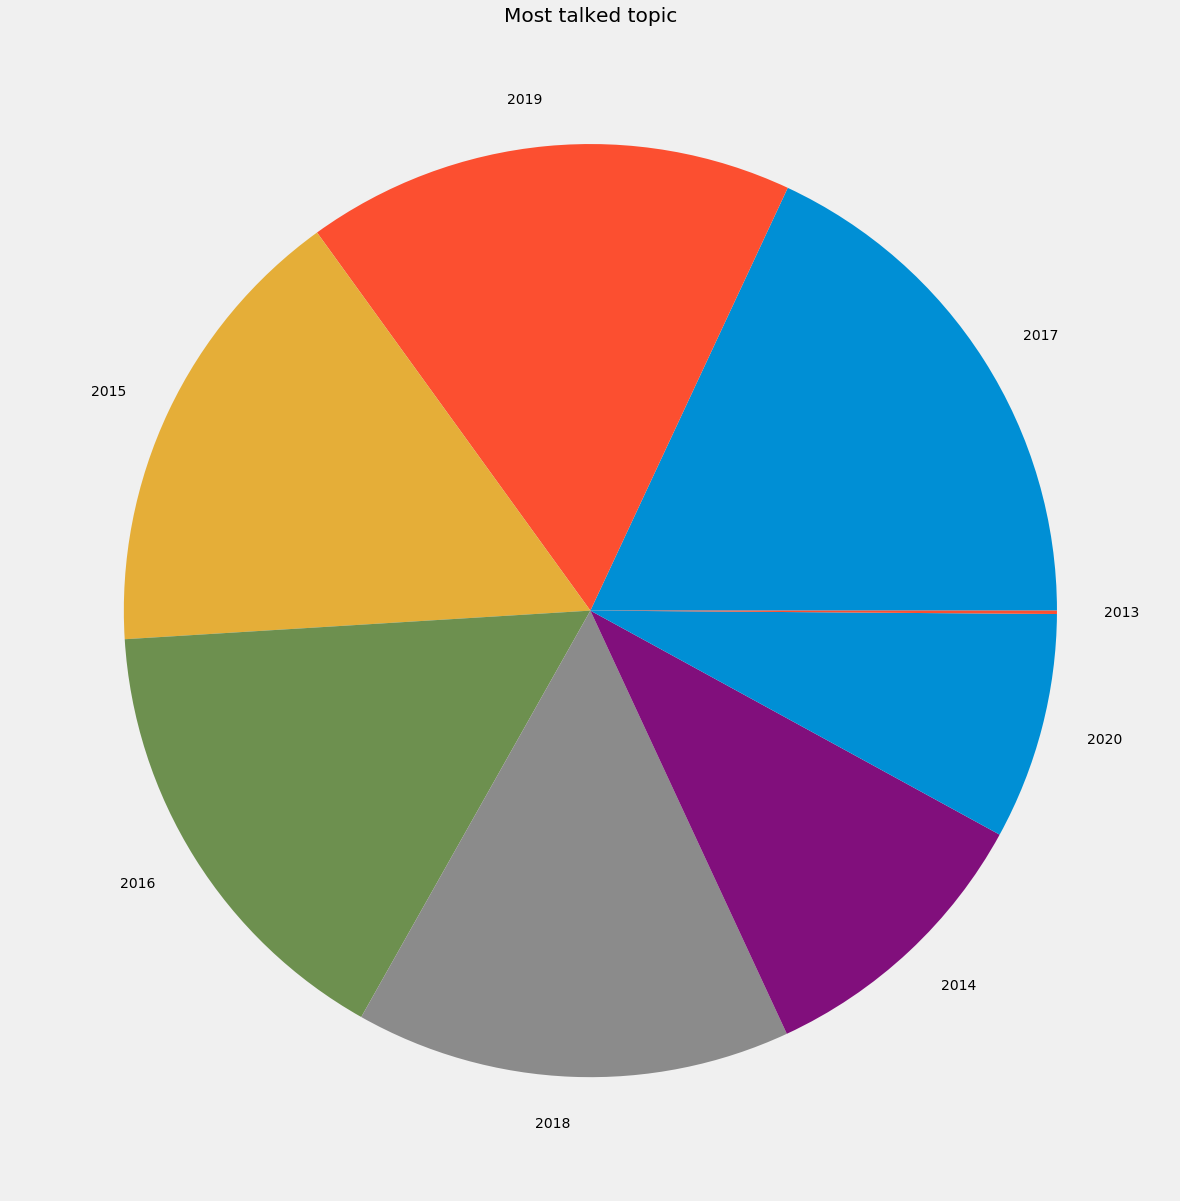

In [9]:
# Yearwise distribution of reddit posts

df2 = data.head(5000)
df2 = df2.dropna()
df2 = df2.sort_values(by='Year', ascending=False)

x=data['Year'].value_counts().index.tolist() #labels
s = pd.Series(data['Year'])
y=s.value_counts() # values

plt.style.use('fivethirtyeight')
plt.grid(True)
plt.title('Most talked topic')
plt.rcParams["figure.figsize"] = (20,20)
patches, texts = plt.pie(y, labels=x)
plt.savefig('fig5.png')